<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793654/blob/main/MNA_IAyAA_semana_6_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

#Importando las librerías que necesitamos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #para gráficos
import seaborn as sns   # para un mejor despliegue de los gráficos

#Esta libraría la voy a usar para hacer la división de datos en datos de entrenamiento y en datos de prueba. 
from sklearn.model_selection import train_test_split

#Las siguientes librerías las voy a usar para crear el pipeline.
from sklearn.pipeline import Pipeline #Esta para armar el pipeline
from sklearn.impute import SimpleImputer #Esta es para simple imputer, sirve para tratamiento de valores nan (missing values)
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler #Esta para hacer el escalado (numércias), onehotencoder (categóricas)
from sklearn.preprocessing import FunctionTransformer #Para variables cuantitativas. La uso en el Pipeline

#**Ejercicio-1.** 

In [7]:
#Importando el archivo

ruta = "/content/drive/MyDrive/DataSet/SouthGermanCredit.asc"
df = pd.read_csv(ruta, sep='\s+')

df.head(3)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [9]:
#Con la siguiente línea voy a sacar los títulos de las columnas
df.columns

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')

In [10]:
#Con el siguiente procedimiento voy a cambiar los nombres de las columas

df.rename(columns = {
    'laufkont':'status',
    'laufzeit':'duration',
    'moral':'credit_history',
    'verw':'purpose',
    'hoehe':'amount',
    'sparkont':'savings',
    'beszeit':'employment_duration',
    'rate':'installment_rate',
    'famges':'personal_status_sex',
    'buerge':'other_debtors',
    'wohnzeit':'present_residence',
    'verm':'property',
    'alter':'age',
    'weitkred':'other_installment_plans',
    'wohn':'housing',
    'bishkred':'number_credits',
    'beruf':'job',
    'pers':'people_liable',
    'telef':'telephone',
    'gastarb':'foreign_worker',
    'kredit':'credit_risk'
}, inplace = True)

In [11]:
#Aquí simplemente verifico que hayan quedado los nombres correctamente

df.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

#**Ejercicio-2.**

In [12]:
#Antes de comenzar a dividir el dataframe, voy a entender cuál es su tamaño
df.shape

(1000, 21)

In [13]:
 #Vamos primero a generar el dataframe de entradas X y de la salida Y

X = df.iloc[:,:20]
Y = df.iloc[:, -1]

#Con las siguientes líneas simplemente estoy verificando el tamaño de los arreglos. De una base de 21 entradas, quedé con X en 20  y Y en 1.
print(X.shape)
print(Y.shape)

(1000, 20)
(1000,)


In [14]:
#Vamos a generar ahora el conjunto de validación y prueba. Usaré train_test_split
#Estoy generando grupos tv (training and validation dado que voy a usar kfold) y grupos Test (prueba).
#Cuando me refiero a grupos hablo de las entradas X y salida Y

X_tv, X_test, Y_tv, Y_test = train_test_split (X, Y, train_size = 0.85, random_state = 1)

In [15]:
#Vamos a entender cómo quedó el grupo training-validation y el grupo test

print(X_tv.shape)
print(X_test.shape)
print(Y_tv.shape)
print(Y_test.shape)

(850, 20)
(150, 20)
(850,)
(150,)


In [16]:
#Transformaciones de datos antes de pasar a los modelos
#primero voy a definir el arreglo de variables que corresponden a cada tipo así:

var_categorical = ["status", "credit_history", "purpose", "savings", "personal_status_sex", "other_debtors", "other_installement_plans", "housing"]
var_ordinal_discretized_quantitative = ["employment_duration", "installement_rate", "present_residence", "number_credits", "people_liable"]
var_quantitative = ["duration", "amount", "age"]
var_binary = ["telephone", "foreing_worker"]
var_ordinal = ["property", "job"]

In [17]:
#a. Imputación de variables: dererminar si hay alguna variable que tenga valores nulos. Se verá a continuación que no hay ningún valor nulo.
X.isnull().any()

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
dtype: bool

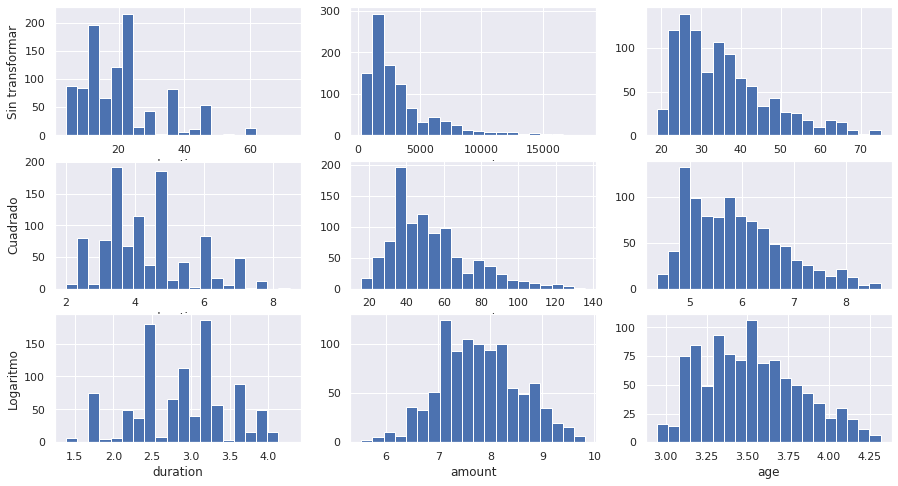

In [18]:
#Análisis de variables numéricas.
#Primero voy a hacer un histograma de las variables numéricas para entender cómo se encuentran distribuídas y entender cuál es la mejor transformación.
#Variables cuantitativas: ammount, duration, age

#Voy a hacer un df de prueba apenas con las variables categóricas, las cuales definí arriba ya.
df_prueba =df[var_quantitative]


sns.set(rc={'figure.figsize':(15,8)})   # (ancho-columnas, altura-renglones) Ajustemos el tamaño de la ventana 
                                         # que desplegará los gráficos usando la librería de seaborn (sns).

#con esta instrucción voy a hacer un histograma de cada uno de los datos de entrada
fig, axes = plt.subplots(3, 3)    # Definimos una ventana de 1x3 nichos para incluir en cada uno de ellos un gráfico.

for k in range (0, 3):
  
  #Caso de la variable original
  #La primera línea indica cuál histograma vamos a usar, la segunda ya es la instrucción para imprimir el histograma y la tercera es el label X
  plt.subplot(3,3,k+1) 
  plt.hist(df_prueba[df_prueba.columns[k]], bins=20)
  plt.xlabel(df_prueba.columns[k])
  if k == 0:
    plt.ylabel("Sin transformar")

  #Caso de la raiz quadrada de la variable 
  plt.subplot(3,3,k+4) 
  plt.hist(np.sqrt(df_prueba[df_prueba.columns[k]]), bins=20)
  plt.xlabel(df_prueba.columns[k])
  if k == 0:
   plt.ylabel("Cuadrado")

  #Caso de la variable elevado al logaritmo natural
  plt.subplot(3,3,k+7) 
  plt.hist(np.log(df_prueba[df_prueba.columns[k]]), bins=20)
  plt.xlabel(df_prueba.columns[k])
  if k == 0:
    plt.ylabel("Logaritmo")

In [19]:
#Pipeline para variables numéricas (quantitativas)
      #Definición del Pipeline
mi_pip_quantitative = Pipeline(steps = [("Escalar", MinMaxScaler(feature_range=(1,2))), ("Log", FunctionTransformer(np.log))])
      #Definición de las variables a las cuales le voy a aplicar el pipeline. Son las mismas de var_quantitative
#var_quantitative

#Pipeline para variables categóricas y binarias.
      #Definición del pipeline.  Si bien arriba ya había visto que no hay valores faltantes, voy a colocar reemplazar los valores faltantes por la moda sólo como práctica estádar.
mi_pip_categorical = Pipeline(steps=[("Imputación", SimpleImputer(strategy="most-frequent")),("Onehotencoder", OneHotEncoder(drop = "first"))])
      #Definición de las variables a las cuales le voy a aplicar el pipeline. Son las mismas de var_categorical
#var_categorical

#Pipeline para variables binarias
      #Definición del pipeline
mi_pip_binary = Pipeline(steps=[("Imputación", SimpleImputer(strategy="most-frequent")),("Onehotencoder", OneHotEncoder(drop = "first"))])
      #Definición de las variables a las cuales le voy a aplicar el pipeline. Son las mismas de var_binary
#var_binary

#**Ejercicio-3.**

In [14]:
from sklearn.metrics import confusion_matrix

def mi_cm(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)
  txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']
  vf = [ '( VN )', '( FP )', '( FN )', '( VP )']
  frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in zip(txt,vf, frecuencia,porcentaje)]
  labels = np.asarray(labels).reshape(2,2)

  plt.figure(figsize=(6,4))
  ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Spectral', cbar=False)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
  plt.show()  



In [15]:

def mi_recall(yreal, ypred):
  
  cm = confusion_matrix(yreal, ypred)  
  vp, fn = cm[1,1], cm[1,0]
  recall = vp / (vp+fn)
  return recall

In [16]:
def mi_gmean(yreal, ypred):

     ##########################################################################
     ##########################################################################
     # INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
     # Ejercicio 3
     # Incluye las líneas de código que calculen el valor de la métrica G-mean.
     # Sustituye None por tus líneas de código. 
     # Se esperan en promedio unas 4 líneas de código.

     cm = confusion_matrix(yreal, ypred)
     recall = mi_recall(yreal, ypred)
     vn, fp = cm[0,0], cm[0,1]
     especificidad = vn / (vn+fp)

     gmean = np.sqrt(recall * especificidad)

     return gmean

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  # MLP - Red Neuronal Artificial / Perceptrón Lineal Multicapa:  
  modelos.append(RandomForestClassifier(n_estimators = 10, criterion = 'entropy'))
  nombres.append('RFC')
  
  return modelos, nombres

In [18]:
modelosOU, nombres = get_models()       
resultados = list()

for i in range(len(modelosOU)):

  model = LogisticRegression(class_weight='balanced')    
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3) 
  pipe = make_pipeline((modelosOU[i]), (model))

  # Ejercicio 5.1:  
  mismetricas = {'accuracy':'accuracy', 'recall':make_scorer(mi_recall), 'gmean':make_scorer(mi_gmean) }

  # Ejercicio 5.2:
  resultadosOU = cross_validate(pipe, X, y, scoring=mismetricas, cv=kfold)

  # Ejercicio 5.3:
  # agregando resultados a la lista:
  resultados.append(resultadosOU)

  
  # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
  #########################################################################





  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']), 
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_gmean']),
                                                                          np.std(resultadosOU['test_gmean']),  
                                                                          ))

NameError: ignored

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RepeatedStratifiedKFold

modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):

  #pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(mi_pip_quantitative, X_tv, np.ravel(Y_tv), scoring='accuracy', cv=cv)


  resultados.append(scores)
  print('>> %s: %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))

NameError: ignored

In [ ]:
None

#**Ejercicio-4.**

In [ ]:
None

#**Ejercicio-5.**

In [ ]:
None

#**Ejercicio-6.**

In [ ]:
None

###**Fin de la Actividad de la semana 6.**